In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color

In [271]:
df= pd.read_csv("listings.csv")

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22948 non-null  int64  
 1   listing_url                                   22948 non-null  object 
 2   scrape_id                                     22948 non-null  int64  
 3   last_scraped                                  22948 non-null  object 
 4   source                                        22948 non-null  object 
 5   name                                          22945 non-null  object 
 6   description                                   21921 non-null  object 
 7   neighborhood_overview                         14532 non-null  object 
 8   picture_url                                   22948 non-null  object 
 9   host_id                                       22948 non-null 

In [273]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df["room_type"] = df["room_type"].str.replace("Entire home/apt","1")
df["room_type"] = df["room_type"].str.replace("Hotel room","2")
df["room_type"] = df["room_type"].str.replace("Private room","3")
df["room_type"] = df["room_type"].str.replace("Shared room","4")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


id                                      listing_url  \
0                   35797               https://www.airbnb.com/rooms/35797   
1                  783480              https://www.airbnb.com/rooms/783480   
2                  796477              https://www.airbnb.com/rooms/796477   
3                   44616               https://www.airbnb.com/rooms/44616   
4                  817291              https://www.airbnb.com/rooms/817291   
...                   ...                                              ...   
22943  697457011724147393  https://www.airbnb.com/rooms/697457011724147393   
22944            22175774            https://www.airbnb.com/rooms/22175774   
22945             1911707             https://www.airbnb.com/rooms/1911707   
22946            45285491            https://www.airbnb.com/rooms/45285491   
22947            45318880            https://www.airbnb.com/rooms/45318880   

            scrape_id last_scraped       source  \
0      20220922013610   2022-09-22  city scrape   
1      20220922013610   2022-09-22  city scrape   
2      20220922013610   2022-09-23  city scrape   
3      20220922013610   2022-09-23  city scrape   
4      20220922013610   2022-09-22  city scrape   
...               ...          ...          ...   
22943  20220922013610   2022-09-22  city scrape   
22944  20220922013610   2022-09-22  city scrape   
22945  20220922013610   2022-09-22  city scrape   
22946  20220922013610   2022-09-22  city scrape   
22947  20220922013610   2022-09-22  city scrape   

                                                    name  \
0                                            Villa Dante   
1                    Area Sta.Fe,IberoABC Hospital Rooms   
2                Classic but Modern Apartment in Condesa   
3                                      CONDESA HAUS  B&B   
4                     Live Mexico City Like a Small Town   
...                                                  ...   
22943              Depa seguro a 10 mns en auto del AICM   
22944  Comoda habitación con vista e iluminación natural   
22945                 Beautiful house gardens & terraces   
22946  Amplio Dpto a 5 min de Av P. de las Palmas/Par...   
22947  Dpto Equipado a 3 min P. de las Palmas!Gym/Par...   

                                             description  \
0      Dentro de Villa un estudio de arte con futon, ...   
1      <b>The space</b><br />Two beautifully furnishe...   
2      Spacious and comfortable room on historic buil...   
3      A new concept of hosting in mexico through a b...   
4      Beautiful and cozy apartment in Mexico City, w...   
...                                                  ...   
22943  Fines de semana suenan los antros.<br /><br />...   
22944  Comoda habitación con excelente iluminación na...   
22945  Once home to a native from Yucatan. Wonderfull...   
22946  El departamento es de dos plantas, en el prime...   
22947  El departamento es muy lindo tiene cocina equi...   

                                   neighborhood_overview  \
0      Centro comercial Santa Fe, parque interlomas y...   
1      The neighborhood is very quiet. There are smal...   
2      Condesa is surrounded by important museums and...   
3                                                    NaN   
4      Please check the guidebook. We have posted man...   
...                                                  ...   
22943  Tres santos, Oxxo, Banorte, servicios en gener...   
22944  La colonia esta situada en la zona poniente de...   
22945                                                NaN   
22946                                                NaN   
22947                                                NaN   

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/f395ab78-1185...     153786  ...   
1      https://a0.muscache.com/pictures/12600230/eec8...    4129056  ...   
2      https://a0.muscache.com/pictures/58251607/70e9...    4195771  ...   
3     

In [274]:
dff = df[['host_acceptance_rate','price','availability_365','number_of_reviews',
          'review_scores_rating','review_scores_cleanliness','review_scores_communication', 'room_type']]
dff

host_acceptance_rate     price  availability_365  number_of_reviews  \
0                      NaN   4001.00               363                  0   
1                      100    500.00               363                 27   
2                       67    599.00               323                144   
3                       79  18000.00               331                 58   
4                      100    740.00               314                 61   
...                    ...       ...               ...                ...   
22943                  NaN    450.00               365                  0   
22944                  NaN    750.00                89                  3   
22945                  100   5041.00               348                 28   
22946                   99   1100.00               361                 72   
22947                   99    959.00               352                 40   

       review_scores_rating  review_scores_cleanliness  \
0                       NaN                        NaN   
1                      4.96                       4.93   
2                      4.73                       4.70   
3                      4.59                       4.70   
4                      4.85                       4.80   
...                     ...                        ...   
22943                   NaN                        NaN   
22944                  5.00                       5.00   
22945                  4.89                       4.96   
22946                  4.44                       4.64   
22947                  4.75                       4.80   

       review_scores_communication room_type  
0                              NaN         1  
1                             4.93         3  
2                             4.91         3  
3                             4.75         1  
4                             4.95         1  
...                            ...       ...  
22943                          NaN         4  
22944                         5.00         3  
22945                         4.93         1  
22946                         4.29         1  
22947                         4.48         1  

[22948 rows x 8 columns]

In [275]:
dff['host_acceptance_rate'] = pd.to_numeric(dff['host_acceptance_rate'],errors = 'coerce')
dff['price'] = pd.to_numeric(dff['price'],errors = 'coerce')
dff['room_type'] = pd.to_numeric(dff['room_type'],errors = 'coerce')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         20483 non-null  float64
 1   price                        22948 non-null  float64
 2   availability_365             22948 non-null  int64  
 3   number_of_reviews            22948 non-null  int64  
 4   review_scores_rating         18881 non-null  float64
 5   review_scores_cleanliness    18787 non-null  float64
 6   review_scores_communication  18787 non-null  float64
 7   room_type                    22948 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.4 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [276]:
df1 =dff.fillna(round(df.mean(),1))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


host_acceptance_rate    price  availability_365  number_of_reviews  \
0                       NaN   4001.0               363                  0   
1                     100.0    500.0               363                 27   
2                      67.0    599.0               323                144   
3                      79.0  18000.0               331                 58   
4                     100.0    740.0               314                 61   
...                     ...      ...               ...                ...   
22943                   NaN    450.0               365                  0   
22944                   NaN    750.0                89                  3   
22945                 100.0   5041.0               348                 28   
22946                  99.0   1100.0               361                 72   
22947                  99.0    959.0               352                 40   

       review_scores_rating  review_scores_cleanliness  \
0                      4.70                       4.70   
1                      4.96                       4.93   
2                      4.73                       4.70   
3                      4.59                       4.70   
4                      4.85                       4.80   
...                     ...                        ...   
22943                  4.70                       4.70   
22944                  5.00                       5.00   
22945                  4.89                       4.96   
22946                  4.44                       4.64   
22947                  4.75                       4.80   

       review_scores_communication  room_type  
0                             4.80          1  
1                             4.93          3  
2                             4.91          3  
3                             4.75          1  
4                             4.95          1  
...                            ...        ...  
22943                         4.80          4  
22944                         5.00          3  
22945                         4.93          1  
22946                         4.29          1  
22947                         4.48          1  

[22948 rows x 8 columns]

In [277]:
df1 = dff.fillna(method="bfill")
df1

host_acceptance_rate    price  availability_365  number_of_reviews  \
0                     100.0   4001.0               363                  0   
1                     100.0    500.0               363                 27   
2                      67.0    599.0               323                144   
3                      79.0  18000.0               331                 58   
4                     100.0    740.0               314                 61   
...                     ...      ...               ...                ...   
22943                 100.0    450.0               365                  0   
22944                 100.0    750.0                89                  3   
22945                 100.0   5041.0               348                 28   
22946                  99.0   1100.0               361                 72   
22947                  99.0    959.0               352                 40   

       review_scores_rating  review_scores_cleanliness  \
0                      4.96                       4.93   
1                      4.96                       4.93   
2                      4.73                       4.70   
3                      4.59                       4.70   
4                      4.85                       4.80   
...                     ...                        ...   
22943                  5.00                       5.00   
22944                  5.00                       5.00   
22945                  4.89                       4.96   
22946                  4.44                       4.64   
22947                  4.75                       4.80   

       review_scores_communication  room_type  
0                             4.93          1  
1                             4.93          3  
2                             4.91          3  
3                             4.75          1  
4                             4.95          1  
...                            ...        ...  
22943                         5.00          4  
22944                         5.00          3  
22945                         4.93          1  
22946                         4.29          1  
22947                         4.48          1  

[22948 rows x 8 columns]

In [278]:
sns.set_style('darkgrid')

plt.figure(dpi = 240, figsize = (50,30)) #resolucion
mask = np.triu(np.ones_like(df.corr(), dtype = bool))

sns.heatmap(df.corr(), mask = mask, annot = True)
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

In [279]:
y=df1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 8.5*iqr
Limite_Inferior_iqr= percentile25 - 8.5*iqr
print("Limite superior permitido: \n", Limite_Superior_iqr)
print("Limite inferior permitido: \n", Limite_Inferior_iqr)

Limite superior permitido: 
 host_acceptance_rate            159.500
price                          9905.000
availability_365               2163.500
number_of_reviews               343.000
review_scores_rating              7.805
review_scores_cleanliness         7.465
review_scores_communication       6.530
room_type                        20.000
dtype: float64
Limite inferior permitido: 
 host_acceptance_rate             33.500
price                         -7915.000
availability_365              -1670.500
number_of_reviews              -305.000
review_scores_rating              1.865
review_scores_cleanliness         2.245
review_scores_communication       3.290
room_type                       -16.000
dtype: float64


In [280]:
df2= df1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df2

host_acceptance_rate   price  availability_365  number_of_reviews  \
0                     100.0  4001.0               363                0.0   
1                     100.0   500.0               363               27.0   
2                      67.0   599.0               323              144.0   
3                      79.0     NaN               331               58.0   
4                     100.0   740.0               314               61.0   
...                     ...     ...               ...                ...   
22943                 100.0   450.0               365                0.0   
22944                 100.0   750.0                89                3.0   
22945                 100.0  5041.0               348               28.0   
22946                  99.0  1100.0               361               72.0   
22947                  99.0   959.0               352               40.0   

       review_scores_rating  review_scores_cleanliness  \
0                      4.96                       4.93   
1                      4.96                       4.93   
2                      4.73                       4.70   
3                      4.59                       4.70   
4                      4.85                       4.80   
...                     ...                        ...   
22943                  5.00                       5.00   
22944                  5.00                       5.00   
22945                  4.89                       4.96   
22946                  4.44                       4.64   
22947                  4.75                       4.80   

       review_scores_communication  room_type  
0                             4.93          1  
1                             4.93          3  
2                             4.91          3  
3                             4.75          1  
4                             4.95          1  
...                            ...        ...  
22943                         5.00          4  
22944                         5.00          3  
22945                         4.93          1  
22946                         4.29          1  
22947                         4.48          1  

[22948 rows x 8 columns]

In [281]:
df3=df2.copy()
df3=df3.fillna(round(df3.mean(),1))
df3 = df3.dropna()
valores_nulos=df3.isnull().sum().sum()
valores_nulos

0

Text(0.5, 1.0, 'Correlation Heatmap')

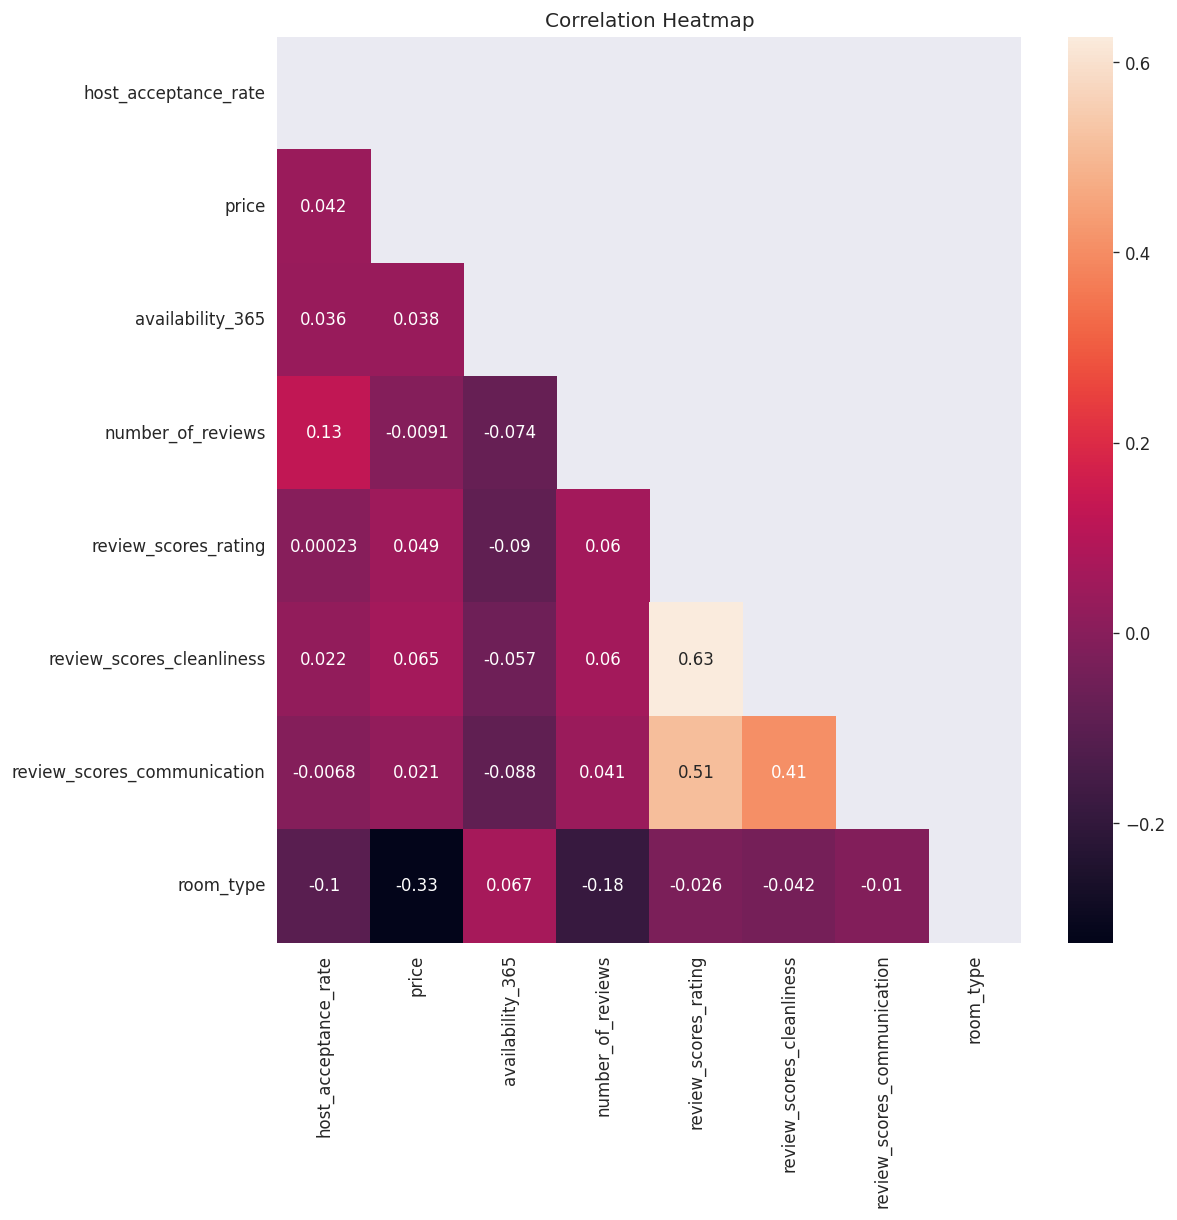

In [282]:
plt.figure(dpi = 120, figsize = (10,10)) #resolucion
mask = np.triu(np.ones_like(df3.corr(), dtype = bool))

sns.heatmap(df3.corr(), mask = mask, annot = True)
plt.title('Correlation Heatmap')

In [283]:
# Primer tipo de habitación
dff1 = df3[df3['room_type'] == 1]
print(dff1)
cor = dff1.corr()

       host_acceptance_rate   price  availability_365  number_of_reviews  \
0                     100.0  4001.0               363                0.0   
3                      79.0  1187.6               331               58.0   
4                     100.0   740.0               314               61.0   
5                      92.0   650.0               354               76.0   
6                     100.0  1441.0               319               51.0   
...                     ...     ...               ...                ...   
22939                  93.0   550.0               349               78.0   
22942                 100.0   390.0               343               10.0   
22945                 100.0  5041.0               348               28.0   
22946                  99.0  1100.0               361               72.0   
22947                  99.0   959.0               352               40.0   

       review_scores_rating  review_scores_cleanliness  \
0                      4.96  

Coeficiente de correlacion:  0.12424884362740495


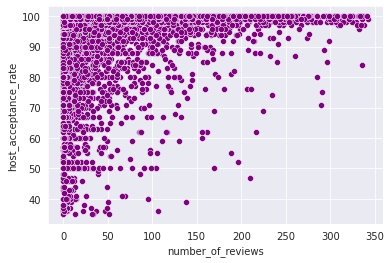

In [284]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="purple", data=dff1)
print('Coeficiente de correlacion: ',cor['number_of_reviews']['host_acceptance_rate'])

Coeficiente de correlacion:  0.06416522463575262


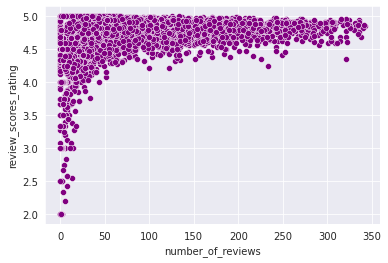

In [285]:
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', color="purple", data=dff1)
print('Coeficiente de correlacion: ',cor['number_of_reviews']['review_scores_rating'])

Coeficiente de correlacion:  -0.0680098567044619


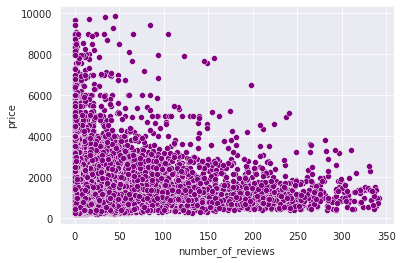

In [286]:
sns.scatterplot(x='number_of_reviews', y='price', color="purple", data=dff1)
print('Coeficiente de correlacion: ',cor['number_of_reviews']['price'])

Coeficiente de correlacion:  0.06267027556507446


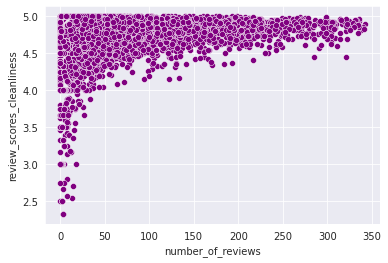

In [287]:
sns.scatterplot(x='number_of_reviews', y='review_scores_cleanliness', color="purple", data=dff1)
print('Coeficiente de correlacion: ',cor['number_of_reviews']['review_scores_cleanliness'])

Coeficiente de correlacion:  -0.06257972710072517


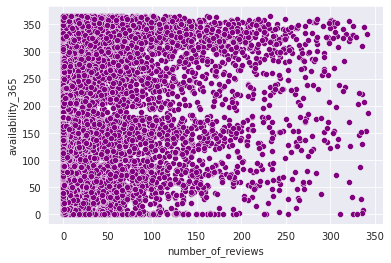

In [288]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="purple", data=dff1)
print('Coeficiente de correlacion: ',cor['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  0.05462691220569764


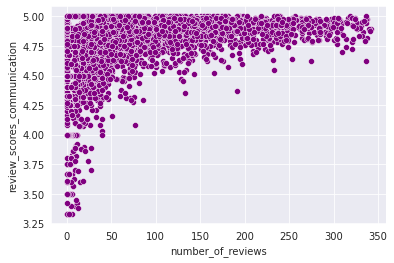

In [289]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="purple", data=dff1)
print('Coeficiente de correlacion: ',cor['number_of_reviews']['review_scores_communication'])

In [290]:
# Segundo tipo de habitación
dff2 = df3[df3['room_type'] == 2]
print(dff2)
cor2 = dff2.corr()

       host_acceptance_rate   price  availability_365  number_of_reviews  \
22                     88.0  1098.0               348               31.0   
24                     94.3   600.0               364                9.0   
26                     88.0   998.0               345               44.0   
31                     88.0   998.0               327               19.0   
45                     79.0  2860.0               347                7.0   
...                     ...     ...               ...                ...   
10795                 100.0     0.0                 0                0.0   
10797                  87.0     0.0                 0                0.0   
10799                 100.0     0.0                 0                0.0   
10801                 100.0     0.0                 0                0.0   
12884                 100.0  1680.0               358                0.0   

       review_scores_rating  review_scores_cleanliness  \
22                     4.97  

Coeficiente de correlacion:  0.17010857504429874


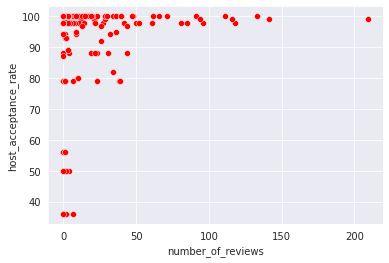

In [291]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="red", data=dff2)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['host_acceptance_rate'])

Coeficiente de correlacion:  0.07857120242066584


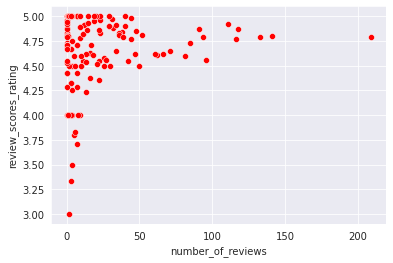

In [292]:
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', color="red", data=dff2)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['review_scores_rating'])

Coeficiente de correlacion:  -0.11258927854911632


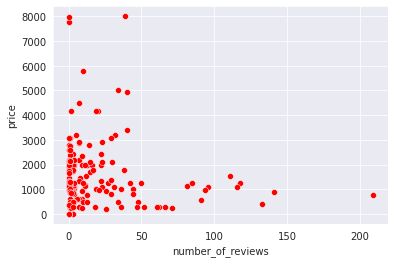

In [293]:
sns.scatterplot(x='number_of_reviews', y='price', color="red", data=dff2)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['price'])

Coeficiente de correlacion:  0.005464183850176457


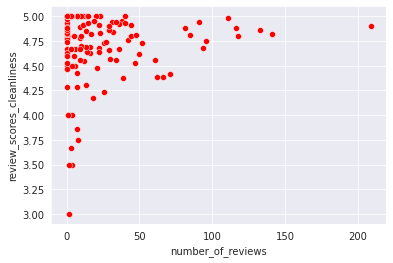

In [294]:
sns.scatterplot(x='number_of_reviews', y='review_scores_cleanliness', color="red", data=dff2)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['review_scores_cleanliness'])

Coeficiente de correlacion:  -0.07493701353250393


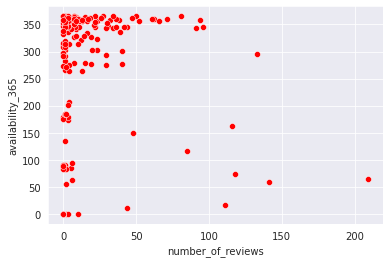

In [295]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="red", data=dff2)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  -0.04683349280678844


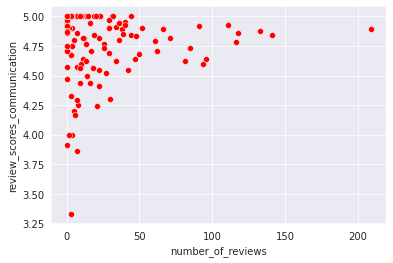

In [296]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="red", data=dff2)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['review_scores_communication'])

In [297]:
# Tipo de habitación 3
dff3 = df3[df3['room_type'] == 3]
print(dff3)
cor3 = dff3.corr()

       host_acceptance_rate   price  availability_365  number_of_reviews  \
1                     100.0   500.0               363               27.0   
2                      67.0   599.0               323              144.0   
8                      79.0  1198.0               175               58.0   
16                     99.0  1360.0                88                0.0   
18                     62.0   440.0               297              127.0   
...                     ...     ...               ...                ...   
22937                 100.0   500.0               365                0.0   
22938                 100.0   210.0               365                9.0   
22940                 100.0   899.0               179                0.0   
22941                  97.0   400.0               365               25.0   
22944                 100.0   750.0                89                3.0   

       review_scores_rating  review_scores_cleanliness  \
1                      4.96  

Coeficiente de correlacion:  0.09701076722643154


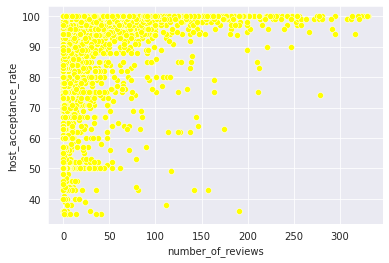

In [298]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=dff3)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['host_acceptance_rate'])

Coeficiente de correlacion:  0.04791752543418256


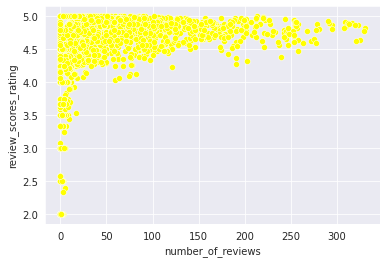

In [299]:
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', color="yellow", data=dff3)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['review_scores_rating'])

Coeficiente de correlacion:  -0.0910070685114233


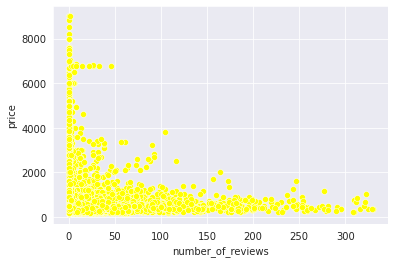

In [300]:
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=dff3)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['price'])

Coeficiente de correlacion:  0.042294278771249146


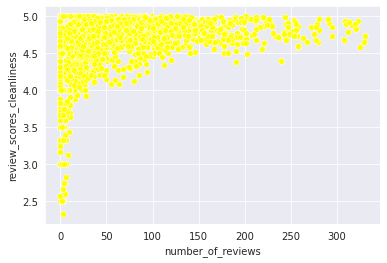

In [301]:
sns.scatterplot(x='number_of_reviews', y='review_scores_cleanliness', color="yellow", data=dff3)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['review_scores_cleanliness'])

Coeficiente de correlacion:  -0.06499579540453086


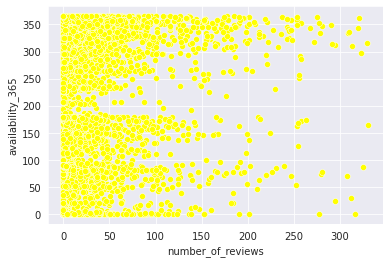

In [302]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="yellow", data=dff3)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  0.013760838036908885


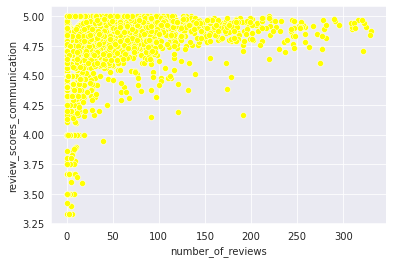

In [303]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="yellow", data=dff3)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['review_scores_communication'])

In [304]:
print('Correlacion Entire Home: \n',cor['number_of_reviews'])
print()
print('Correlacion Hotel Room: \n',cor2['number_of_reviews'])
print()
print('Correlacion Private Room: \n',cor3['number_of_reviews'])

Correlacion Entire Home: 
 host_acceptance_rate           0.124249
price                         -0.068010
availability_365              -0.062580
number_of_reviews              1.000000
review_scores_rating           0.064165
review_scores_cleanliness      0.062670
review_scores_communication    0.054627
room_type                           NaN
Name: number_of_reviews, dtype: float64

Correlacion Hotel Room: 
 host_acceptance_rate           0.170109
price                         -0.112589
availability_365              -0.074937
number_of_reviews              1.000000
review_scores_rating           0.078571
review_scores_cleanliness      0.005464
review_scores_communication   -0.046833
room_type                           NaN
Name: number_of_reviews, dtype: float64

Correlacion Private Room: 
 host_acceptance_rate           0.097011
price                         -0.091007
availability_365              -0.064996
number_of_reviews              1.000000
review_scores_rating           0.0479

In [305]:
Vars_Indep= df3[['number_of_reviews']]
Var_Dep= df3[['host_acceptance_rate']]

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)
model.score(Vars_Indep,Var_Dep)

0.016053025933484455

In [306]:
y_pred= model.predict(X=df3[['number_of_reviews']])
y_pred

array([[93.4594852 ],
       [94.24631643],
       [97.65591841],
       ...,
       [94.27545833],
       [95.55770181],
       [94.62516109]])

In [307]:
df3.insert(0, 'Predicciones', y_pred)
df3

Predicciones  host_acceptance_rate   price  availability_365  \
0         93.459485                 100.0  4001.0               363   
1         94.246316                 100.0   500.0               363   
2         97.655918                  67.0   599.0               323   
3         95.149715                  79.0  1187.6               331   
4         95.237141                 100.0   740.0               314   
...             ...                   ...     ...               ...   
22943     93.459485                 100.0   450.0               365   
22944     93.546911                 100.0   750.0                89   
22945     94.275458                 100.0  5041.0               348   
22946     95.557702                  99.0  1100.0               361   
22947     94.625161                  99.0   959.0               352   

       number_of_reviews  review_scores_rating  review_scores_cleanliness  \
0                    0.0                  4.96                       4.93   
1                   27.0                  4.96                       4.93   
2                  144.0                  4.73                       4.70   
3                   58.0                  4.59                       4.70   
4                   61.0                  4.85                       4.80   
...                  ...                   ...                        ...   
22943                0.0                  5.00                       5.00   
22944                3.0                  5.00                       5.00   
22945               28.0                  4.89                       4.96   
22946               72.0                  4.44                       4.64   
22947               40.0                  4.75                       4.80   

       review_scores_communication  room_type  
0                             4.93          1  
1                             4.93          3  
2                             4.91          3  
3                             4.75          1  
4                             4.95          1  
...                            ...        ...  
22943                         5.00          4  
22944                         5.00          3  
22945                         4.93          1  
22946                         4.29          1  
22947                         4.48          1  

[22948 rows x 9 columns]

Coeficiente de determinación:  0.016053025933484455
Coeficiente de correlación:  0.1267005364372403


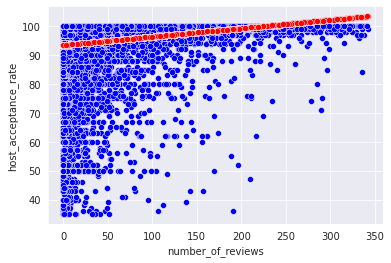

In [308]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=df3)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="red", data=df3)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)

coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinación: ", coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

**Regresión múltiple para Milan**

In [309]:
df= pd.read_csv("montreal.csv")
df

id                                      listing_url  \
0                    2843                https://www.airbnb.com/rooms/2843   
1                   29059               https://www.airbnb.com/rooms/29059   
2                  298059              https://www.airbnb.com/rooms/298059   
3                   29061               https://www.airbnb.com/rooms/29061   
4                  309367              https://www.airbnb.com/rooms/309367   
...                   ...                                              ...   
13616            23623745            https://www.airbnb.com/rooms/23623745   
13617  670156236403890655  https://www.airbnb.com/rooms/670156236403890655   
13618            20697173            https://www.airbnb.com/rooms/20697173   
13619  670513785200359144  https://www.airbnb.com/rooms/670513785200359144   
13620            23561492            https://www.airbnb.com/rooms/23561492   

            scrape_id last_scraped           source  \
0      20220912200208   2022-09-12      city scrape   
1      20220912200208   2022-09-13      city scrape   
2      20220912200208   2022-09-13      city scrape   
3      20220912200208   2022-09-13      city scrape   
4      20220912200208   2022-09-13      city scrape   
...               ...          ...              ...   
13616  20220912200208   2022-09-13      city scrape   
13617  20220912200208   2022-09-13      city scrape   
13618  20220912200208   2022-09-13      city scrape   
13619  20220912200208   2022-09-13      city scrape   
13620  20220912200208   2022-09-13  previous scrape   

                                                 name  \
0                      Fabulous downtown/airport room   
1                        Lovely studio Quartier Latin   
2                   Superb cottage Mile-End Plateau !   
3                  Maison historique - Quartier Latin   
4                    Charming and Clean ! 5 min Métro   
...                                               ...   
13616   The treehouse Den. A cozy place for composers   
13617                                   Condo Moderne   
13618  Studio à 2 pas de Montréal / for 1 person only   
13619              Superbe condo luxueux près de tout   
13620                                 Laval apartment   

                                             description  \
0      Come stay in this trendy area of downtown Mont...   
1      CITQ 267153<br />Lovely studio with 1 closed r...   
2      <b>The space</b><br />Superb bright cottage de...   
3      Lovely historic house with plenty of period ch...   
4      Feel like home in a dynamic area, close to eve...   
...                                                  ...   
13616  Arrival: Free and easy parking on both sides o...   
13617   Kick back and relax in this calm, stylish space.   
13618  Renting for a single person only, sorry don’t ...   
13619  Profitez de l'atmosphère stylée de ce logement...   
13620  My apartment is located in the heart of Laval....   

                                   neighborhood_overview  \
0      This area of St Henri is actually downtown Mon...   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
13616  Nearby: Library (Multicultural Library), St. L...   
13617                                                NaN   
13618  Agréable cartier de Duvernay (Val des Arbres) ...   
13619  Place Bell et centre-ville à 2 min en auto. Be...   
13620  Walking distance to metro Stn. Also close to m...   

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/397204dc-4123...       2319  ...   
1      https://a0.muscache.com/pictures/736399/fa6c31...     125031  ...   
2      https://a0.muscache.com/pictures/f53f3590-103d...    1536474  .

In [310]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df["room_type"] = df["room_type"].str.replace("Entire home/apt","1")
df["room_type"] = df["room_type"].str.replace("Hotel room","2")
df["room_type"] = df["room_type"].str.replace("Private room","3")
df["room_type"] = df["room_type"].str.replace("Shared room","4")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


id                                      listing_url  \
0                    2843                https://www.airbnb.com/rooms/2843   
1                   29059               https://www.airbnb.com/rooms/29059   
2                  298059              https://www.airbnb.com/rooms/298059   
3                   29061               https://www.airbnb.com/rooms/29061   
4                  309367              https://www.airbnb.com/rooms/309367   
...                   ...                                              ...   
13616            23623745            https://www.airbnb.com/rooms/23623745   
13617  670156236403890655  https://www.airbnb.com/rooms/670156236403890655   
13618            20697173            https://www.airbnb.com/rooms/20697173   
13619  670513785200359144  https://www.airbnb.com/rooms/670513785200359144   
13620            23561492            https://www.airbnb.com/rooms/23561492   

            scrape_id last_scraped           source  \
0      20220912200208   2022-09-12      city scrape   
1      20220912200208   2022-09-13      city scrape   
2      20220912200208   2022-09-13      city scrape   
3      20220912200208   2022-09-13      city scrape   
4      20220912200208   2022-09-13      city scrape   
...               ...          ...              ...   
13616  20220912200208   2022-09-13      city scrape   
13617  20220912200208   2022-09-13      city scrape   
13618  20220912200208   2022-09-13      city scrape   
13619  20220912200208   2022-09-13      city scrape   
13620  20220912200208   2022-09-13  previous scrape   

                                                 name  \
0                      Fabulous downtown/airport room   
1                        Lovely studio Quartier Latin   
2                   Superb cottage Mile-End Plateau !   
3                  Maison historique - Quartier Latin   
4                    Charming and Clean ! 5 min Métro   
...                                               ...   
13616   The treehouse Den. A cozy place for composers   
13617                                   Condo Moderne   
13618  Studio à 2 pas de Montréal / for 1 person only   
13619              Superbe condo luxueux près de tout   
13620                                 Laval apartment   

                                             description  \
0      Come stay in this trendy area of downtown Mont...   
1      CITQ 267153<br />Lovely studio with 1 closed r...   
2      <b>The space</b><br />Superb bright cottage de...   
3      Lovely historic house with plenty of period ch...   
4      Feel like home in a dynamic area, close to eve...   
...                                                  ...   
13616  Arrival: Free and easy parking on both sides o...   
13617   Kick back and relax in this calm, stylish space.   
13618  Renting for a single person only, sorry don’t ...   
13619  Profitez de l'atmosphère stylée de ce logement...   
13620  My apartment is located in the heart of Laval....   

                                   neighborhood_overview  \
0      This area of St Henri is actually downtown Mon...   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
13616  Nearby: Library (Multicultural Library), St. L...   
13617                                                NaN   
13618  Agréable cartier de Duvernay (Val des Arbres) ...   
13619  Place Bell et centre-ville à 2 min en auto. Be...   
13620  Walking distance to metro Stn. Also close to m...   

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/397204dc-4123...       2319  ...   
1      https://a0.muscache.com/pictures/736399/fa6c31...     125031  ...   
2      https://a0.muscache.com/pictures/f53f3590-103d...    1536474  .

In [311]:
dff = df[['host_acceptance_rate','price','availability_365','number_of_reviews',
          'review_scores_rating','review_scores_cleanliness','review_scores_communication', 'room_type']]
dff

host_acceptance_rate   price  availability_365  number_of_reviews  \
0                      100   60.00                80                157   
1                       97  152.00               306                385   
2                      NaN  180.00               104                 52   
3                       97  286.00               250                108   
4                        0   64.00                74                 22   
...                    ...     ...               ...                ...   
13616                   98   90.00                86                178   
13617                   94  188.00               350                  4   
13618                   98   68.00                21                195   
13619                   89  136.00                89                  8   
13620                  NaN   90.00                 0                 22   

       review_scores_rating  review_scores_cleanliness  \
0                      4.41                       4.30   
1                      4.68                       4.65   
2                      4.87                       4.92   
3                      4.68                       4.64   
4                      4.67                       4.95   
...                     ...                        ...   
13616                  4.48                       4.56   
13617                  4.75                       4.50   
13618                  4.89                       4.97   
13619                  4.63                       4.75   
13620                  4.91                       4.86   

       review_scores_communication room_type  
0                             4.73         3  
1                             4.78         1  
2                             5.00         1  
3                             4.79         1  
4                             4.91         1  
...                            ...       ...  
13616                         4.89         1  
13617                         5.00         1  
13618                         4.89         1  
13619                         4.63         1  
13620                         5.00         1  

[13621 rows x 8 columns]

In [312]:
dff['host_acceptance_rate'] = pd.to_numeric(dff['host_acceptance_rate'],errors = 'coerce')
dff['price'] = pd.to_numeric(dff['price'],errors = 'coerce')
dff['room_type'] = pd.to_numeric(dff['room_type'],errors = 'coerce')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13621 entries, 0 to 13620
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         9678 non-null   float64
 1   price                        13621 non-null  float64
 2   availability_365             13621 non-null  int64  
 3   number_of_reviews            13621 non-null  int64  
 4   review_scores_rating         11047 non-null  float64
 5   review_scores_cleanliness    10855 non-null  float64
 6   review_scores_communication  10854 non-null  float64
 7   room_type                    13621 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 851.4 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [313]:
df1 =dff.fillna(round(df.mean(),1))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


host_acceptance_rate  price  availability_365  number_of_reviews  \
0                     100.0   60.0                80                157   
1                      97.0  152.0               306                385   
2                       NaN  180.0               104                 52   
3                      97.0  286.0               250                108   
4                       0.0   64.0                74                 22   
...                     ...    ...               ...                ...   
13616                  98.0   90.0                86                178   
13617                  94.0  188.0               350                  4   
13618                  98.0   68.0                21                195   
13619                  89.0  136.0                89                  8   
13620                   NaN   90.0                 0                 22   

       review_scores_rating  review_scores_cleanliness  \
0                      4.41                       4.30   
1                      4.68                       4.65   
2                      4.87                       4.92   
3                      4.68                       4.64   
4                      4.67                       4.95   
...                     ...                        ...   
13616                  4.48                       4.56   
13617                  4.75                       4.50   
13618                  4.89                       4.97   
13619                  4.63                       4.75   
13620                  4.91                       4.86   

       review_scores_communication  room_type  
0                             4.73          3  
1                             4.78          1  
2                             5.00          1  
3                             4.79          1  
4                             4.91          1  
...                            ...        ...  
13616                         4.89          1  
13617                         5.00          1  
13618                         4.89          1  
13619                         4.63          1  
13620                         5.00          1  

[13621 rows x 8 columns]

In [314]:
df1 = dff.fillna(method="bfill")
df1

host_acceptance_rate  price  availability_365  number_of_reviews  \
0                     100.0   60.0                80                157   
1                      97.0  152.0               306                385   
2                      97.0  180.0               104                 52   
3                      97.0  286.0               250                108   
4                       0.0   64.0                74                 22   
...                     ...    ...               ...                ...   
13616                  98.0   90.0                86                178   
13617                  94.0  188.0               350                  4   
13618                  98.0   68.0                21                195   
13619                  89.0  136.0                89                  8   
13620                   NaN   90.0                 0                 22   

       review_scores_rating  review_scores_cleanliness  \
0                      4.41                       4.30   
1                      4.68                       4.65   
2                      4.87                       4.92   
3                      4.68                       4.64   
4                      4.67                       4.95   
...                     ...                        ...   
13616                  4.48                       4.56   
13617                  4.75                       4.50   
13618                  4.89                       4.97   
13619                  4.63                       4.75   
13620                  4.91                       4.86   

       review_scores_communication  room_type  
0                             4.73          3  
1                             4.78          1  
2                             5.00          1  
3                             4.79          1  
4                             4.91          1  
...                            ...        ...  
13616                         4.89          1  
13617                         5.00          1  
13618                         4.89          1  
13619                         4.63          1  
13620                         5.00          1  

[13621 rows x 8 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

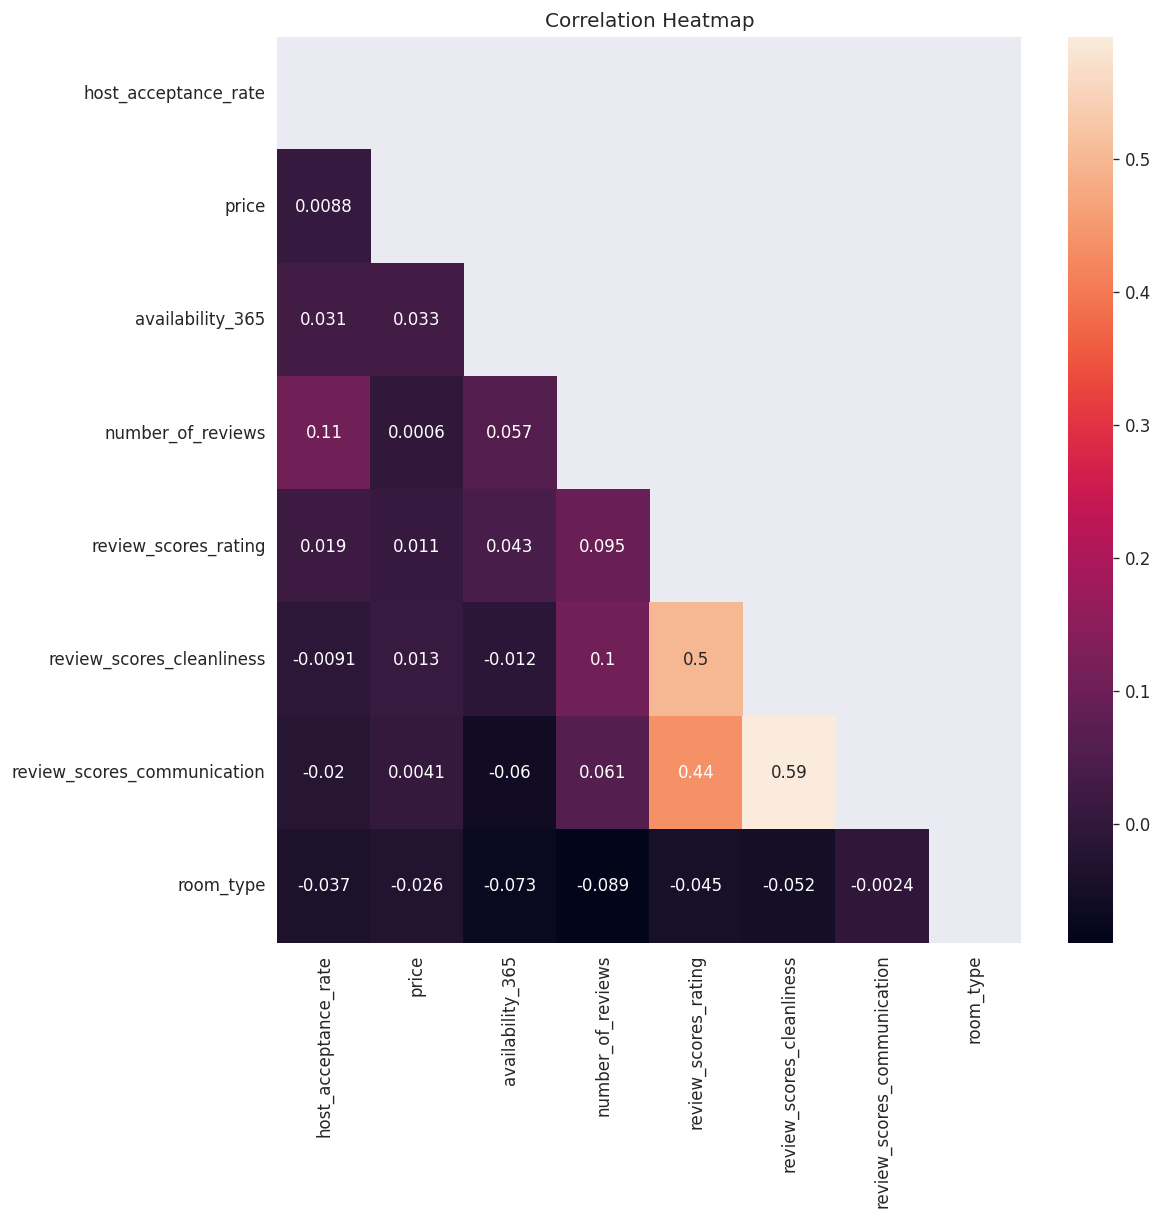

In [315]:
sns.set_style('darkgrid')

plt.figure(dpi = 120, figsize = (10,10)) #resolucion
mask = np.triu(np.ones_like(df1.corr(), dtype = bool))

sns.heatmap(df1.corr(), mask = mask, annot = True)
plt.title('Correlation Heatmap')

In [316]:
# Tipo de cuarto 1
dff1 = df1[df1['room_type'] == 1]
dff1

host_acceptance_rate  price  availability_365  number_of_reviews  \
1                      97.0  152.0               306                385   
2                      97.0  180.0               104                 52   
3                      97.0  286.0               250                108   
4                       0.0   64.0                74                 22   
5                      64.0  160.0               117                  8   
...                     ...    ...               ...                ...   
13616                  98.0   90.0                86                178   
13617                  94.0  188.0               350                  4   
13618                  98.0   68.0                21                195   
13619                  89.0  136.0                89                  8   
13620                   NaN   90.0                 0                 22   

       review_scores_rating  review_scores_cleanliness  \
1                      4.68                       4.65   
2                      4.87                       4.92   
3                      4.68                       4.64   
4                      4.67                       4.95   
5                      4.86                       5.00   
...                     ...                        ...   
13616                  4.48                       4.56   
13617                  4.75                       4.50   
13618                  4.89                       4.97   
13619                  4.63                       4.75   
13620                  4.91                       4.86   

       review_scores_communication  room_type  
1                             4.78          1  
2                             5.00          1  
3                             4.79          1  
4                             4.91          1  
5                             5.00          1  
...                            ...        ...  
13616                         4.89          1  
13617                         5.00          1  
13618                         4.89          1  
13619                         4.63          1  
13620                         5.00          1  

[10523 rows x 8 columns]

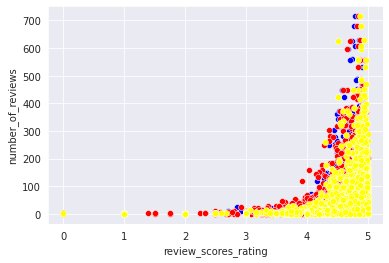

In [317]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff1)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="red", data=dff1)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="yellow", data=dff1)

In [318]:
Vars_Indep= dff1[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= dff1['number_of_reviews']

In [319]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [320]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [321]:
model.score(Vars_Indep,Var_Dep)

0.014080708289744281

In [322]:
y_pred= model.predict(X=dff1[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred

array([26.95119929, 29.56208415, 26.85408375, ..., 30.22932076,
       27.79594224, 29.24438826])

In [323]:
dff1.insert(0, 'Predicciones Multiple', y_pred)
dff1

Predicciones Multiple  host_acceptance_rate  price  availability_365  \
1                  26.951199                  97.0  152.0               306   
2                  29.562084                  97.0  180.0               104   
3                  26.854084                  97.0  286.0               250   
4                  29.118367                   0.0   64.0                74   
5                  30.166245                  64.0  160.0               117   
...                      ...                   ...    ...               ...   
13616              25.211001                  98.0   90.0                86   
13617              25.671444                  94.0  188.0               350   
13618              30.229321                  98.0   68.0                21   
13619              27.795942                  89.0  136.0                89   
13620              29.244388                   NaN   90.0                 0   

       number_of_reviews  review_scores_rating  review_scores_cleanliness  \
1                    385                  4.68                       4.65   
2                     52                  4.87                       4.92   
3                    108                  4.68                       4.64   
4                     22                  4.67                       4.95   
5                      8                  4.86                       5.00   
...                  ...                   ...                        ...   
13616                178                  4.48                       4.56   
13617                  4                  4.75                       4.50   
13618                195                  4.89                       4.97   
13619                  8                  4.63                       4.75   
13620                 22                  4.91                       4.86   

       review_scores_communication  room_type  
1                             4.78          1  
2                             5.00          1  
3                             4.79          1  
4                             4.91          1  
5                             5.00          1  
...                            ...        ...  
13616                         4.89          1  
13617                         5.00          1  
13618                         4.89          1  
13619                         4.63          1  
13620                         5.00          1  

[10523 rows x 9 columns]

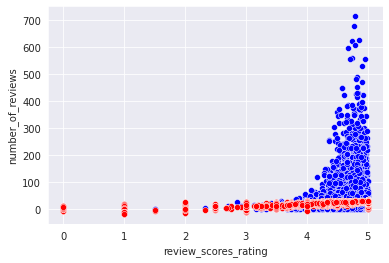

In [324]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff1)
sns.scatterplot(x='review_scores_rating', y='Predicciones Multiple', color="red", data=dff1)

In [325]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.014080708289744281

In [326]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1186621603112984

In [327]:
# Tipo de cuarto 2
dff2 = df1[df1['room_type'] == 2]
dff2

host_acceptance_rate  price  availability_365  number_of_reviews  \
2107                   90.0  186.0               212                 45   
2132                   90.0  186.0               220                 29   
2134                   90.0  186.0               218                 32   
2177                   90.0  199.0               156                 31   
2184                   90.0  186.0               222                 15   
4031                   90.0  199.0               236                  7   
4047                   90.0  194.0               189                  3   
4048                   90.0  194.0               207                  3   
4050                   90.0  199.0               224                  7   
4054                   90.0  199.0               252                  3   
4557                   97.0  353.0               144                 32   
4563                   97.0  352.0               133                 35   
4864                   99.0  307.0               362                 47   
4866                   99.0  301.0               361                  6   
4867                   99.0  317.0               106                 19   
4869                   99.0  269.0               351                 10   
4872                   99.0   75.0               365                 42   
4874                   99.0  102.0               364                 14   
4875                   99.0   85.0               365                 11   
4876                   99.0   65.0               365                137   
4877                   99.0   71.0               363                 28   
4888                   99.0  248.0               347                 16   
5473                   90.0  200.0                 0                 40   
5485                   90.0  200.0                 0                 14   
5591                   90.0  200.0                 0                  7   
5593                   90.0  200.0                 0                  6   
5594                   90.0  200.0                 0                  4   
5595                   90.0  200.0                 0                  2   
5596                   90.0  200.0                 0                  5   
5687                  100.0  214.0               337                  5   
5902                   98.0  150.0                14                 11   
7327                   98.0    0.0                 0                  0   
7328                   98.0    0.0                 0                 45   
7330                   83.0    0.0                 0                  0   
13382                 100.0  138.0               254                 28   
13388                 100.0  138.0               254                 11   
13482                 100.0  148.0               254                 11   

       review_scores_rating  review_scores_cleanliness  \
2107                   4.76                       4.87   
2132                   4.66                       4.90   
2134                   4.84                       4.91   
2177                   4.90                       4.94   
2184                   4.67                       4.87   
4031                   4.86                       5.00   
4047                   5.00                       5.00   
4048                   4.67                       5.00   
4050                   4.86                       5.00   
4054                   5.00                       5.00   
4557                   4.56                       4.66   
4563                   4.65                       4.91   
4864                   4.79                       4.83   
4866                   4.67                       5.00   
4867                   4.79                       4.79   
4869                   4.80                       4.90   
4872                   4.57                       4.62   
4874                   4.29                       4.36   
4875                   4.91                       4.82

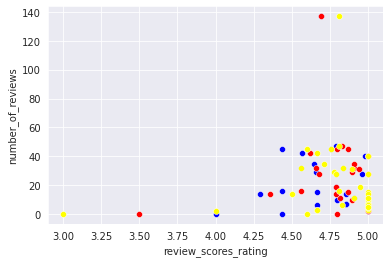

In [328]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff2)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="red", data=dff2)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="yellow", data=dff2)

In [329]:
Vars_Indep= dff2[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= dff2['number_of_reviews']

In [330]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [331]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [332]:
model.score(Vars_Indep,Var_Dep)

0.06854398361891278

In [333]:
y_pred2= model.predict(X=dff2[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred2

array([19.60812606, 21.55297463, 19.17537889, 18.85081851, 27.41609144,
       20.96873892, 18.11214971, 16.63460699, 20.96873892,  9.90121813,
       22.86507719, 19.81756912, 21.03101969, 20.61566472, 25.30538455,
       24.1703398 , 26.18895164, 32.81336196, 23.50775554, 25.83972826,
       23.49941002, 33.5113333 , 18.52023388, 25.12117049, 20.96873892,
       18.11214971, 18.11214971, -6.76946113, 18.11214971, 18.11214971,
       15.87280473, 23.54055895, 23.54055895, 18.41336216, 18.92831806,
       19.94852849, 18.11214971])

In [334]:
dff2.insert(0, 'Predicciones Multiple 2', y_pred2)
dff2

Predicciones Multiple 2  host_acceptance_rate  price  availability_365  \
2107                 19.608126                  90.0  186.0               212   
2132                 21.552975                  90.0  186.0               220   
2134                 19.175379                  90.0  186.0               218   
2177                 18.850819                  90.0  199.0               156   
2184                 27.416091                  90.0  186.0               222   
4031                 20.968739                  90.0  199.0               236   
4047                 18.112150                  90.0  194.0               189   
4048                 16.634607                  90.0  194.0               207   
4050                 20.968739                  90.0  199.0               224   
4054                  9.901218                  90.0  199.0               252   
4557                 22.865077                  97.0  353.0               144   
4563                 19.817569                  97.0  352.0               133   
4864                 21.031020                  99.0  307.0               362   
4866                 20.615665                  99.0  301.0               361   
4867                 25.305385                  99.0  317.0               106   
4869                 24.170340                  99.0  269.0               351   
4872                 26.188952                  99.0   75.0               365   
4874                 32.813362                  99.0  102.0               364   
4875                 23.507756                  99.0   85.0               365   
4876                 25.839728                  99.0   65.0               365   
4877                 23.499410                  99.0   71.0               363   
4888                 33.511333                  99.0  248.0               347   
5473                 18.520234                  90.0  200.0                 0   
5485                 25.121170                  90.0  200.0                 0   
5591                 20.968739                  90.0  200.0                 0   
5593                 18.112150                  90.0  200.0                 0   
5594                 18.112150                  90.0  200.0                 0   
5595                 -6.769461                  90.0  200.0                 0   
5596                 18.112150                  90.0  200.0                 0   
5687                 18.112150                 100.0  214.0               337   
5902                 15.872805                  98.0  150.0                14   
7327                 23.540559                  98.0    0.0                 0   
7328                 23.540559                  98.0    0.0                 0   
7330                 18.413362                  83.0    0.0                 0   
13382                18.928318                 100.0  138.0               254   
13388                19.948528                 100.0  138.0               254   
13482                18.112150                 100.0  148.0               254   

       number_of_reviews  review_scores_rating  review_scores_cleanliness  \
2107                  45                  4.76                       4.87   
2132                  29                  4.66                       4.90   
2134                  32                  4.84                       4.91   
2177                  31                  4.90                       4.94   
2184                  15                  4.67                       4.87   
4031                   7                  4.86                       5.00   
4047                   3                  5.00                       5.00   
4048                   3                  4.67                       5.00   
4050                   7                  4.86                       5.00   
4054                   3                  5.00                       5.00   
4557                  32                  4.56                       4.66   
4563

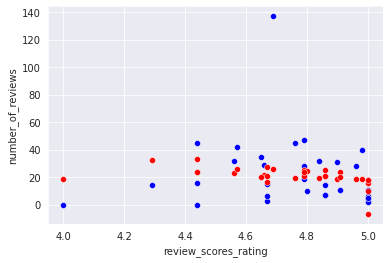

In [335]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff2)
sns.scatterplot(x='review_scores_rating', y='Predicciones Multiple 2', color="red", data=dff2)

In [336]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.06854398361891278

In [337]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.26180905946684274

In [338]:
# Tipo de cuarto 3
dff3 = df1[df1['room_type'] == 3]
dff3

host_acceptance_rate  price  availability_365  number_of_reviews  \
0                     100.0   60.0                80                157   
8                      18.0   33.0                 0                  6   
9                      18.0   50.0               319                 17   
10                     78.0   32.0               255                 26   
11                     98.0   66.0               356                 37   
...                     ...    ...               ...                ...   
13588                  98.0   48.0                77                  5   
13593                  50.0   98.0               179                  1   
13597                 100.0   26.0               299                  0   
13603                 100.0   50.0                47                  9   
13610                 100.0   41.0                79                  0   

       review_scores_rating  review_scores_cleanliness  \
0                      4.41                       4.30   
8                      5.00                       4.83   
9                      4.50                       4.25   
10                     4.92                       4.83   
11                     4.53                       4.03   
...                     ...                        ...   
13588                  4.00                       3.80   
13593                  5.00                       5.00   
13597                  5.00                       5.00   
13603                  4.89                       5.00   
13610                  3.00                       4.00   

       review_scores_communication  room_type  
0                             4.73          3  
8                             4.67          3  
9                             4.81          3  
10                            4.96          3  
11                            4.76          3  
...                            ...        ...  
13588                         4.20          3  
13593                         5.00          3  
13597                         5.00          3  
13603                         5.00          3  
13610                         5.00          3  

[2991 rows x 8 columns]

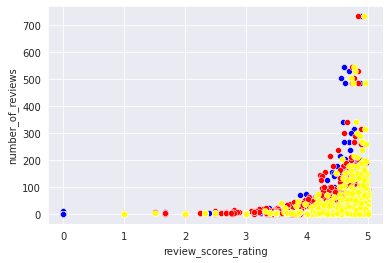

In [339]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff3)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="red", data=dff3)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="yellow", data=dff3)

In [340]:
Vars_Indep= dff3[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= dff3['number_of_reviews']

In [341]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [342]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [343]:
model.score(Vars_Indep,Var_Dep)

0.009567890875257556

In [344]:
y_pred3= model.predict(X=dff3[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred3

array([14.8594371 , 18.60498467, 14.78770638, ..., 18.7232781 ,
       18.42028794,  9.39569664])

In [345]:
dff3.insert(0, 'Predicciones Multiple 3', y_pred3)
dff3

Predicciones Multiple 3  host_acceptance_rate  price  availability_365  \
0                    14.859437                 100.0   60.0                80   
8                    18.604985                  18.0   33.0                 0   
9                    14.787706                  18.0   50.0               319   
10                   17.918097                  78.0   32.0               255   
11                   14.110669                  98.0   66.0               356   
...                        ...                   ...    ...               ...   
13588                12.673401                  98.0   48.0                77   
13593                18.723278                  50.0   98.0               179   
13597                18.723278                 100.0   26.0               299   
13603                18.420288                 100.0   50.0                47   
13610                 9.395697                 100.0   41.0                79   

       number_of_reviews  review_scores_rating  review_scores_cleanliness  \
0                    157                  4.41                       4.30   
8                      6                  5.00                       4.83   
9                     17                  4.50                       4.25   
10                    26                  4.92                       4.83   
11                    37                  4.53                       4.03   
...                  ...                   ...                        ...   
13588                  5                  4.00                       3.80   
13593                  1                  5.00                       5.00   
13597                  0                  5.00                       5.00   
13603                  9                  4.89                       5.00   
13610                  0                  3.00                       4.00   

       review_scores_communication  room_type  
0                             4.73          3  
8                             4.67          3  
9                             4.81          3  
10                            4.96          3  
11                            4.76          3  
...                            ...        ...  
13588                         4.20          3  
13593                         5.00          3  
13597                         5.00          3  
13603                         5.00          3  
13610                         5.00          3  

[2991 rows x 9 columns]

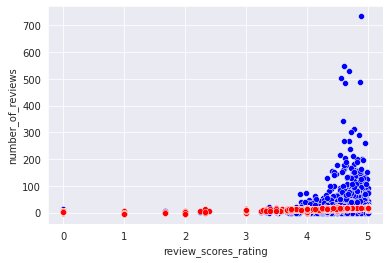

In [346]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff3)
sns.scatterplot(x='review_scores_rating', y='Predicciones Multiple 3', color="red", data=dff3)

In [347]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.009567890875257556

In [348]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.09781559627818846

**Regresión múltiple para Melbourne**

In [349]:
df= pd.read_csv("melbourne.csv")
df

id                            listing_url       scrape_id  \
0        603007    https://www.airbnb.com/rooms/603007  20220909140120   
1        607674    https://www.airbnb.com/rooms/607674  20220909140120   
2          9835      https://www.airbnb.com/rooms/9835  20220909140120   
3        621155    https://www.airbnb.com/rooms/621155  20220909140120   
4       1271310   https://www.airbnb.com/rooms/1271310  20220909140120   
...         ...                                    ...             ...   
18231  40073043  https://www.airbnb.com/rooms/40073043  20220909140120   
18232  30724584  https://www.airbnb.com/rooms/30724584  20220909140120   
18233  27683132  https://www.airbnb.com/rooms/27683132  20220909140120   
18234  30725026  https://www.airbnb.com/rooms/30725026  20220909140120   
18235  43570043  https://www.airbnb.com/rooms/43570043  20220909140120   

      last_scraped           source  \
0       2022-09-10  previous scrape   
1       2022-09-09      city scrape   
2       2022-09-09      city scrape   
3       2022-09-10  previous scrape   
4       2022-09-09      city scrape   
...            ...              ...   
18231   2022-09-09      city scrape   
18232   2022-09-09      city scrape   
18233   2022-09-09      city scrape   
18234   2022-09-09      city scrape   
18235   2022-09-09      city scrape   

                                            name  \
0        Spacious apartment near Botanic Gardens   
1                                            NaN   
2                         Beautiful Room & House   
3                 Picture Perfect Oasis Richmond   
4             Stunning Victorian 1 Brm Apartment   
...                                          ...   
18231  Luxurious three bedroom Castanea cottage.   
18232       Karma Kinglake Nest 4 (2 BR Cottage)   
18233             Stone Cottage Retreat Kinglake   
18234       Karma Kinglake Nest 3 (2 BR Cottage)   
18235             BOYD BAKER HOUSE BACCHUS MARSH   

                                             description  \
0      Well appointed South Yarra apartment, close to...   
1      Edna Walling cottage is a quaint full-sized do...   
2      <b>The space</b><br />House: Clean, New, Moder...   
3      <b>The space</b><br />This gorgeous one bedroo...   
4      Unique Victorian 1 bedroom apartment. Centrall...   
...                                                  ...   
18231  Unique 3 bedroom self contained cottage. Furni...   
18232  Nestled on the top of the Great Dividing Range...   
18233  North facing, 3 bedroom Stone Cottage situated...   
18234  Nestled on the top of the Great Dividing Range...   
18235  One of the most important post war Australian ...   

                                   neighborhood_overview  \
0      Right near the famous Royal Botanic Gardens, a...   
1      Sherbrooke is located in a rainforest with tow...   
2           Very safe! Family oriented. Older age group.   
3                                                    NaN   
4      Its a lovely quiet tree lined street. There ar...   
...                                                  ...   
18231  Explore the wineries of the yarra valley or th...   
18232  Walking distance to the Kinglake Pub and main ...   
18233  Parkland road has about 8 homes in it and 200 ...   
18234  Walking distance to the Kinglake Pub and main ...   
18235                                                NaN   

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/cbbf545f-fe7b...    2705870  ...   
1      https://a0.muscache.com/pictures/11626259/9430...    2558288  ...   
2      https://a0.muscache.com/pictures/44620/5a5815c...      33057  ...   
3      https://a0.muscache.com/pictures/7891547/a413c...     355966  ...   
4      https://a0.muscache.com/pictures/2d5e8201-f3b9...    6919472  ...   
...                                                  ...        ...  ...   
18231  https://a0.muscache.com/pictures/90652fde-db06...

In [350]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df["room_type"] = df["room_type"].str.replace("Entire home/apt","1")
df["room_type"] = df["room_type"].str.replace("Hotel room","2")
df["room_type"] = df["room_type"].str.replace("Private room","3")
df["room_type"] = df["room_type"].str.replace("Shared room","4")
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


id                            listing_url       scrape_id  \
0        603007    https://www.airbnb.com/rooms/603007  20220909140120   
1        607674    https://www.airbnb.com/rooms/607674  20220909140120   
2          9835      https://www.airbnb.com/rooms/9835  20220909140120   
3        621155    https://www.airbnb.com/rooms/621155  20220909140120   
4       1271310   https://www.airbnb.com/rooms/1271310  20220909140120   
...         ...                                    ...             ...   
18231  40073043  https://www.airbnb.com/rooms/40073043  20220909140120   
18232  30724584  https://www.airbnb.com/rooms/30724584  20220909140120   
18233  27683132  https://www.airbnb.com/rooms/27683132  20220909140120   
18234  30725026  https://www.airbnb.com/rooms/30725026  20220909140120   
18235  43570043  https://www.airbnb.com/rooms/43570043  20220909140120   

      last_scraped           source  \
0       2022-09-10  previous scrape   
1       2022-09-09      city scrape   
2       2022-09-09      city scrape   
3       2022-09-10  previous scrape   
4       2022-09-09      city scrape   
...            ...              ...   
18231   2022-09-09      city scrape   
18232   2022-09-09      city scrape   
18233   2022-09-09      city scrape   
18234   2022-09-09      city scrape   
18235   2022-09-09      city scrape   

                                            name  \
0        Spacious apartment near Botanic Gardens   
1                                            NaN   
2                         Beautiful Room & House   
3                 Picture Perfect Oasis Richmond   
4             Stunning Victorian 1 Brm Apartment   
...                                          ...   
18231  Luxurious three bedroom Castanea cottage.   
18232       Karma Kinglake Nest 4 (2 BR Cottage)   
18233             Stone Cottage Retreat Kinglake   
18234       Karma Kinglake Nest 3 (2 BR Cottage)   
18235             BOYD BAKER HOUSE BACCHUS MARSH   

                                             description  \
0      Well appointed South Yarra apartment, close to...   
1      Edna Walling cottage is a quaint full-sized do...   
2      <b>The space</b><br />House: Clean, New, Moder...   
3      <b>The space</b><br />This gorgeous one bedroo...   
4      Unique Victorian 1 bedroom apartment. Centrall...   
...                                                  ...   
18231  Unique 3 bedroom self contained cottage. Furni...   
18232  Nestled on the top of the Great Dividing Range...   
18233  North facing, 3 bedroom Stone Cottage situated...   
18234  Nestled on the top of the Great Dividing Range...   
18235  One of the most important post war Australian ...   

                                   neighborhood_overview  \
0      Right near the famous Royal Botanic Gardens, a...   
1      Sherbrooke is located in a rainforest with tow...   
2           Very safe! Family oriented. Older age group.   
3                                                    NaN   
4      Its a lovely quiet tree lined street. There ar...   
...                                                  ...   
18231  Explore the wineries of the yarra valley or th...   
18232  Walking distance to the Kinglake Pub and main ...   
18233  Parkland road has about 8 homes in it and 200 ...   
18234  Walking distance to the Kinglake Pub and main ...   
18235                                                NaN   

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/cbbf545f-fe7b...    2705870  ...   
1      https://a0.muscache.com/pictures/11626259/9430...    2558288  ...   
2      https://a0.muscache.com/pictures/44620/5a5815c...      33057  ...   
3      https://a0.muscache.com/pictures/7891547/a413c...     355966  ...   
4      https://a0.muscache.com/pictures/2d5e8201-f3b9...    6919472  ...   
...                                                  ...        ...  ...   
18231  https://a0.muscache.com/pictures/90652fde-db06...

In [351]:
dff = df[['host_acceptance_rate','price','availability_365','number_of_reviews',
          'review_scores_rating','review_scores_cleanliness','review_scores_communication', 'room_type']]
dff

host_acceptance_rate    price  availability_365  number_of_reviews  \
0                      NaN    59.00                 0                 21   
1                      100   275.00               362                 16   
2                        0    60.00               365                  4   
3                      NaN   105.00                 0                  1   
4                      100   100.00                 0                 22   
...                    ...      ...               ...                ...   
18231                  100   446.00               275                 12   
18232                   94   255.00               258                 69   
18233                  100   190.00               167                 87   
18234                   94   255.00               262                 25   
18235                   92  1400.00               361                  3   

       review_scores_rating  review_scores_cleanliness  \
0                      4.76                       4.86   
1                      4.00                       4.13   
2                      4.50                       5.00   
3                      5.00                       5.00   
4                      4.82                       4.64   
...                     ...                        ...   
18231                  5.00                       5.00   
18232                  4.83                       4.91   
18233                  4.75                       4.66   
18234                  4.76                       4.92   
18235                  3.33                       4.00   

       review_scores_communication room_type  
0                             5.00         3  
1                             4.33         1  
2                             4.75         3  
3                             5.00         1  
4                             4.86         1  
...                            ...       ...  
18231                         5.00         1  
18232                         4.86         1  
18233                         4.95         1  
18234                         4.84         1  
18235                         5.00         1  

[18236 rows x 8 columns]

In [352]:
dff['host_acceptance_rate'] = pd.to_numeric(dff['host_acceptance_rate'],errors = 'coerce')
dff['price'] = pd.to_numeric(dff['price'],errors = 'coerce')
dff['room_type'] = pd.to_numeric(dff['room_type'],errors = 'coerce')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18236 entries, 0 to 18235
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         11996 non-null  float64
 1   price                        18236 non-null  float64
 2   availability_365             18236 non-null  int64  
 3   number_of_reviews            18236 non-null  int64  
 4   review_scores_rating         14513 non-null  float64
 5   review_scores_cleanliness    14234 non-null  float64
 6   review_scores_communication  14233 non-null  float64
 7   room_type                    18236 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.1 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [353]:
df1 =dff.fillna(round(df.mean(),1))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


host_acceptance_rate   price  availability_365  number_of_reviews  \
0                       NaN    59.0                 0                 21   
1                     100.0   275.0               362                 16   
2                       0.0    60.0               365                  4   
3                       NaN   105.0                 0                  1   
4                     100.0   100.0                 0                 22   
...                     ...     ...               ...                ...   
18231                 100.0   446.0               275                 12   
18232                  94.0   255.0               258                 69   
18233                 100.0   190.0               167                 87   
18234                  94.0   255.0               262                 25   
18235                  92.0  1400.0               361                  3   

       review_scores_rating  review_scores_cleanliness  \
0                      4.76                       4.86   
1                      4.00                       4.13   
2                      4.50                       5.00   
3                      5.00                       5.00   
4                      4.82                       4.64   
...                     ...                        ...   
18231                  5.00                       5.00   
18232                  4.83                       4.91   
18233                  4.75                       4.66   
18234                  4.76                       4.92   
18235                  3.33                       4.00   

       review_scores_communication  room_type  
0                             5.00          3  
1                             4.33          1  
2                             4.75          3  
3                             5.00          1  
4                             4.86          1  
...                            ...        ...  
18231                         5.00          1  
18232                         4.86          1  
18233                         4.95          1  
18234                         4.84          1  
18235                         5.00          1  

[18236 rows x 8 columns]

In [354]:
df1 = dff.fillna(method="bfill")
df1

host_acceptance_rate   price  availability_365  number_of_reviews  \
0                     100.0    59.0                 0                 21   
1                     100.0   275.0               362                 16   
2                       0.0    60.0               365                  4   
3                     100.0   105.0                 0                  1   
4                     100.0   100.0                 0                 22   
...                     ...     ...               ...                ...   
18231                 100.0   446.0               275                 12   
18232                  94.0   255.0               258                 69   
18233                 100.0   190.0               167                 87   
18234                  94.0   255.0               262                 25   
18235                  92.0  1400.0               361                  3   

       review_scores_rating  review_scores_cleanliness  \
0                      4.76                       4.86   
1                      4.00                       4.13   
2                      4.50                       5.00   
3                      5.00                       5.00   
4                      4.82                       4.64   
...                     ...                        ...   
18231                  5.00                       5.00   
18232                  4.83                       4.91   
18233                  4.75                       4.66   
18234                  4.76                       4.92   
18235                  3.33                       4.00   

       review_scores_communication  room_type  
0                             5.00          3  
1                             4.33          1  
2                             4.75          3  
3                             5.00          1  
4                             4.86          1  
...                            ...        ...  
18231                         5.00          1  
18232                         4.86          1  
18233                         4.95          1  
18234                         4.84          1  
18235                         5.00          1  

[18236 rows x 8 columns]

Text(0.5, 1.0, 'Correlation Heatmap')

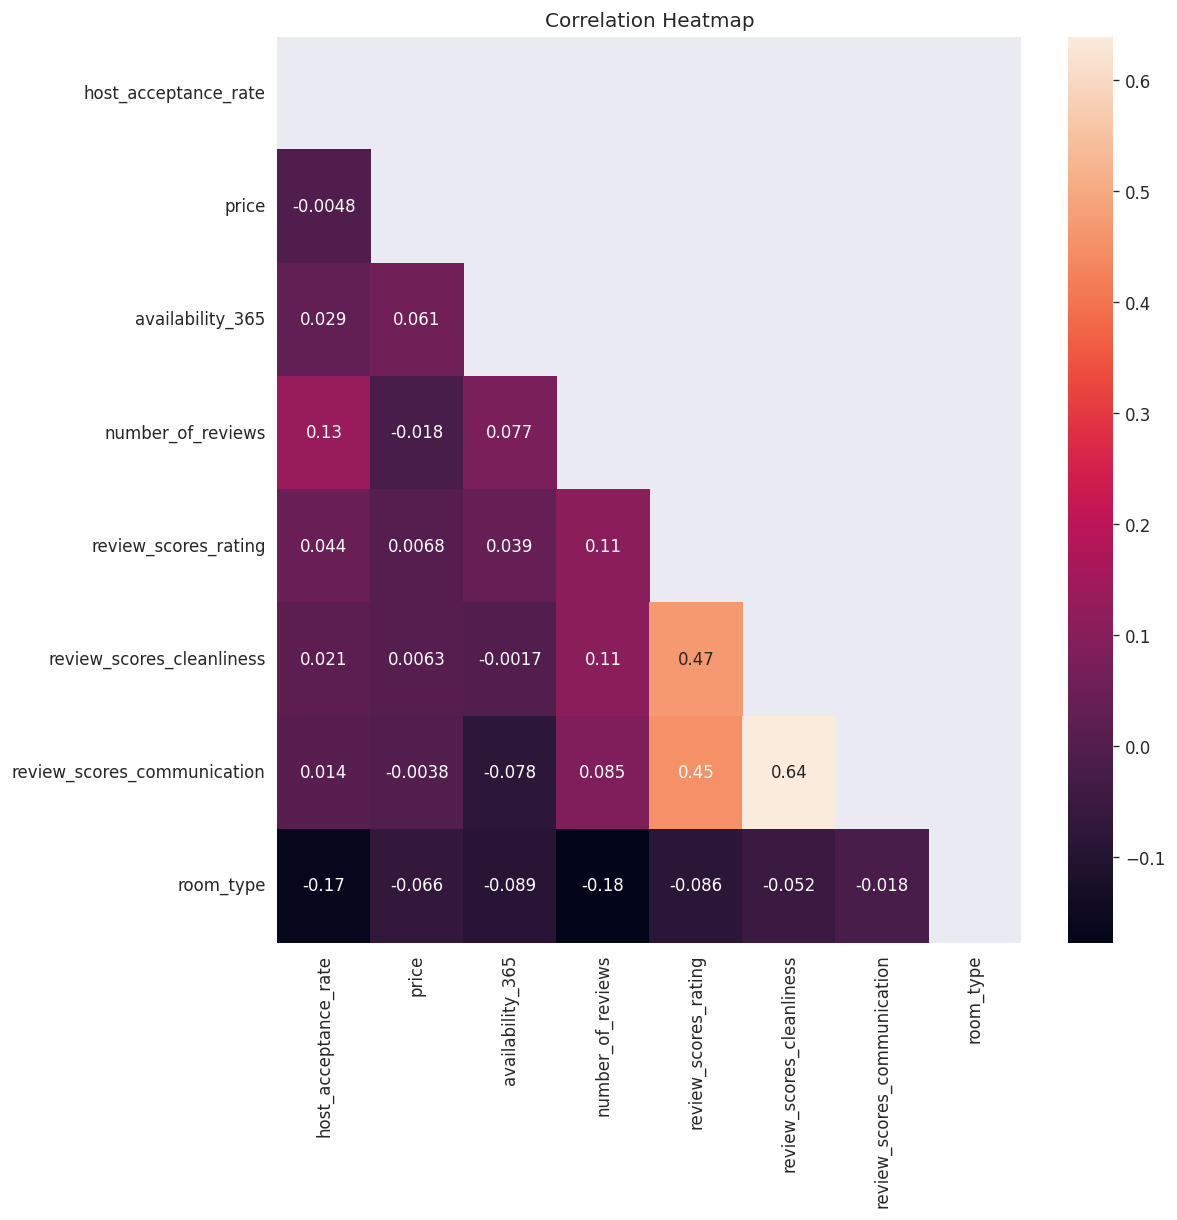

In [355]:
sns.set_style('darkgrid')

plt.figure(dpi = 120, figsize = (10,10)) #resolucion
mask = np.triu(np.ones_like(df1.corr(), dtype = bool))

sns.heatmap(df1.corr(), mask = mask, annot = True)
plt.title('Correlation Heatmap')

In [356]:
dff1 = df1[df1['room_type'] == 1]
dff1

host_acceptance_rate   price  availability_365  number_of_reviews  \
1                     100.0   275.0               362                 16   
3                     100.0   105.0                 0                  1   
4                     100.0   100.0                 0                 22   
8                     100.0    95.0                 0                 42   
9                     100.0   190.0               185                 30   
...                     ...     ...               ...                ...   
18231                 100.0   446.0               275                 12   
18232                  94.0   255.0               258                 69   
18233                 100.0   190.0               167                 87   
18234                  94.0   255.0               262                 25   
18235                  92.0  1400.0               361                  3   

       review_scores_rating  review_scores_cleanliness  \
1                      4.00                       4.13   
3                      5.00                       5.00   
4                      4.82                       4.64   
8                      4.68                       4.71   
9                      4.78                       4.69   
...                     ...                        ...   
18231                  5.00                       5.00   
18232                  4.83                       4.91   
18233                  4.75                       4.66   
18234                  4.76                       4.92   
18235                  3.33                       4.00   

       review_scores_communication  room_type  
1                             4.33          1  
3                             5.00          1  
4                             4.86          1  
8                             4.83          1  
9                             4.97          1  
...                            ...        ...  
18231                         5.00          1  
18232                         4.86          1  
18233                         4.95          1  
18234                         4.84          1  
18235                         5.00          1  

[12717 rows x 8 columns]

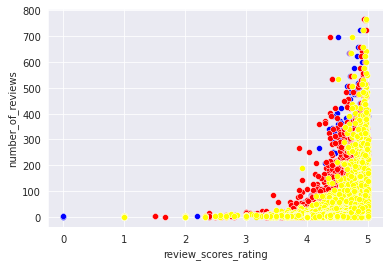

In [357]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff1)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="red", data=dff1)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="yellow", data=dff1)

In [358]:
Vars_Indep= dff1[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= dff1['number_of_reviews']

In [359]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [360]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [361]:
model.score(Vars_Indep,Var_Dep)

0.015548797570136497

In [362]:
y_pred= model.predict(X=dff1[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred

array([26.49839062, 42.48788285, 37.86067796, ..., 37.87450611,
       39.71910692, 23.32232447])

In [363]:
dff1.insert(0, 'Predicciones Multiple', y_pred)
dff1

Predicciones Multiple  host_acceptance_rate   price  availability_365  \
1                  26.498391                 100.0   275.0               362   
3                  42.487883                 100.0   105.0                 0   
4                  37.860678                 100.0   100.0                 0   
8                  37.425576                 100.0    95.0                 0   
9                  38.386130                 100.0   190.0               185   
...                      ...                   ...     ...               ...   
18231              42.487883                 100.0   446.0               275   
18232              40.160496                  94.0   255.0               258   
18233              37.874506                 100.0   190.0               167   
18234              39.719107                  94.0   255.0               262   
18235              23.322324                  92.0  1400.0               361   

       number_of_reviews  review_scores_rating  review_scores_cleanliness  \
1                     16                  4.00                       4.13   
3                      1                  5.00                       5.00   
4                     22                  4.82                       4.64   
8                     42                  4.68                       4.71   
9                     30                  4.78                       4.69   
...                  ...                   ...                        ...   
18231                 12                  5.00                       5.00   
18232                 69                  4.83                       4.91   
18233                 87                  4.75                       4.66   
18234                 25                  4.76                       4.92   
18235                  3                  3.33                       4.00   

       review_scores_communication  room_type  
1                             4.33          1  
3                             5.00          1  
4                             4.86          1  
8                             4.83          1  
9                             4.97          1  
...                            ...        ...  
18231                         5.00          1  
18232                         4.86          1  
18233                         4.95          1  
18234                         4.84          1  
18235                         5.00          1  

[12717 rows x 9 columns]

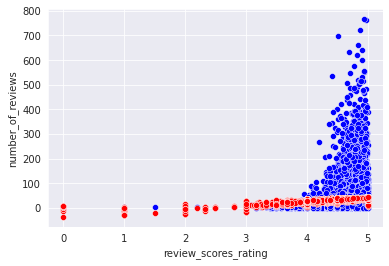

In [364]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff1)
sns.scatterplot(x='review_scores_rating', y='Predicciones Multiple', color="red", data=dff1)

In [365]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.015548797570136497

In [366]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12469481773568819

In [367]:
# Tipo de cuarto 3
dff2 = df1[df1['room_type'] == 2]
dff2

host_acceptance_rate  price  availability_365  number_of_reviews  \
360                    95.0  279.0               297                  5   
775                   100.0  360.0               343                  4   
2278                  100.0  292.0               307                  1   
3543                   86.0  359.0               357                  0   
4247                   76.0  298.0                 6                  3   
...                     ...    ...               ...                ...   
10216                 100.0  288.0               100                  7   
10221                  82.0  275.0               251                  0   
10241                  93.0  269.0               350                  4   
10252                  99.0  272.0               363                 10   
11599                  96.0  233.0               363                 31   

       review_scores_rating  review_scores_cleanliness  \
360                    3.40                       3.20   
775                    3.75                       4.25   
2278                   5.00                       5.00   
3543                   5.00                       4.80   
4247                   4.33                       4.67   
...                     ...                        ...   
10216                  4.71                       4.86   
10221                  4.50                       5.00   
10241                  4.25                       4.00   
10252                  4.60                       4.80   
11599                  4.61                       4.68   

       review_scores_communication  room_type  
360                           4.00          2  
775                           4.50          2  
2278                          5.00          2  
3543                          5.00          2  
4247                          3.33          2  
...                            ...        ...  
10216                         5.00          2  
10221                         4.50          2  
10241                         4.00          2  
10252                         4.50          2  
11599                         4.74          2  

[83 rows x 8 columns]

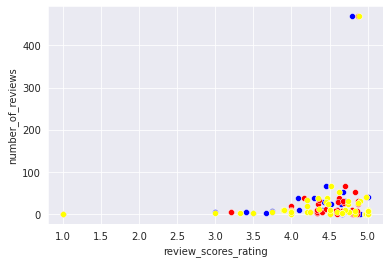

In [368]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff2)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="red", data=dff2)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="yellow", data=dff2)

In [369]:
Vars_Indep= dff2[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= dff2['number_of_reviews']

In [370]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [371]:
model.score(Vars_Indep,Var_Dep)

0.0056590416416689715

In [372]:
y_pred2= model.predict(X=dff2[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred2

array([ 4.67386579, 12.77904598, 16.93513144, 15.24272351, 15.9656953 ,
       18.96521532,  4.58128964, 14.65983539, 15.55616414, 18.50233457,
       10.71022258, 14.96563586, 16.93513144, 10.50317565, 10.50317565,
       11.26556487, -8.79269172, 12.98338182, 11.59879219, 15.59198283,
       15.59198283, 15.59198283, 20.21169764, 15.48066402, 16.93513144,
       11.26556487, 16.93513144, 16.93513144, 11.7827419 , 15.67197442,
       16.93513144, 16.93513144, 16.93513144, 16.93513144, 16.36198468,
       15.55616414, 10.0402949 , 17.44265241, 16.77514827, 12.17134827,
       15.11747105, 10.42845559, 10.66353606, 16.33584327, 14.14265835,
       16.93513144, 12.82938859, 11.95465859, 16.93513144, 17.8344532 ,
       16.93513144, 16.93513144, 14.77819736, 10.07685804, 10.82004207,
       16.93513144, 13.32735277, 10.0402949 , 13.42511077,  9.25669334,
       10.39274341, 16.21509583, 14.79058968, 13.58026331, 14.62950168,
       13.75094329, 12.30741216,  9.83529428, 10.89497643, 14.29

In [373]:
dff2.insert(0, 'Predicciones Multiple 2', y_pred2)
dff2

Predicciones Multiple 2  host_acceptance_rate  price  availability_365  \
360                   4.673866                  95.0  279.0               297   
775                  12.779046                 100.0  360.0               343   
2278                 16.935131                 100.0  292.0               307   
3543                 15.242724                  86.0  359.0               357   
4247                 15.965695                  76.0  298.0                 6   
...                        ...                   ...    ...               ...   
10216                16.204935                 100.0  288.0               100   
10221                17.950173                  82.0  275.0               251   
10241                10.111375                  93.0  269.0               350   
10252                16.101045                  99.0  272.0               363   
11599                14.958837                  96.0  233.0               363   

       number_of_reviews  review_scores_rating  review_scores_cleanliness  \
360                    5                  3.40                       3.20   
775                    4                  3.75                       4.25   
2278                   1                  5.00                       5.00   
3543                   0                  5.00                       4.80   
4247                   3                  4.33                       4.67   
...                  ...                   ...                        ...   
10216                  7                  4.71                       4.86   
10221                  0                  4.50                       5.00   
10241                  4                  4.25                       4.00   
10252                 10                  4.60                       4.80   
11599                 31                  4.61                       4.68   

       review_scores_communication  room_type  
360                           4.00          2  
775                           4.50          2  
2278                          5.00          2  
3543                          5.00          2  
4247                          3.33          2  
...                            ...        ...  
10216                         5.00          2  
10221                         4.50          2  
10241                         4.00          2  
10252                         4.50          2  
11599                         4.74          2  

[83 rows x 9 columns]

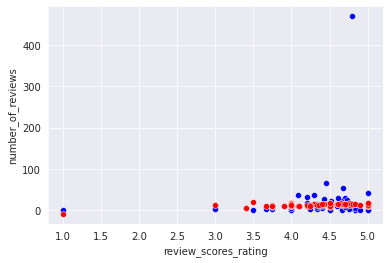

In [374]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff2)
sns.scatterplot(x='review_scores_rating', y='Predicciones Multiple 2', color="red", data=dff2)

In [375]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0056590416416689715

In [376]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.07522660195482028

In [377]:
# Tipo de cuarto 3
dff3 = df1[df1['room_type'] == 3]
dff3

host_acceptance_rate  price  availability_365  number_of_reviews  \
0                     100.0   59.0                 0                 21   
2                       0.0   60.0               365                  4   
5                      93.0   85.0                87                126   
6                      50.0  106.0               180                  1   
7                     100.0   36.0               210                153   
...                     ...    ...               ...                ...   
18157                 100.0   52.0               359                  0   
18173                   0.0   53.0               362                  0   
18193                  99.0  253.0               349                 30   
18224                  46.0  220.0               363                  4   
18226                  58.0   50.0               262                 12   

       review_scores_rating  review_scores_cleanliness  \
0                      4.76                       4.86   
2                      4.50                       5.00   
5                      4.80                       4.92   
6                      5.00                       5.00   
7                      4.46                       3.96   
...                     ...                        ...   
18157                  4.92                       4.92   
18173                  4.93                       4.90   
18193                  5.00                       5.00   
18224                  5.00                       5.00   
18226                  4.58                       4.50   

       review_scores_communication  room_type  
0                             5.00          3  
2                             4.75          3  
5                             4.79          3  
6                             5.00          3  
7                             4.68          3  
...                            ...        ...  
18157                         5.00          3  
18173                         5.00          3  
18193                         5.00          3  
18224                         5.00          3  
18226                         4.83          3  

[5199 rows x 8 columns]

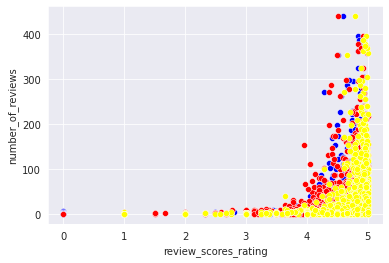

In [378]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff3)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="red", data=dff3)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="yellow", data=dff3)

In [379]:
Vars_Indep= dff3[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= dff3['number_of_reviews']

In [380]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [381]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [382]:
model.score(Vars_Indep,Var_Dep)

0.01576322768266314

In [383]:
y_pred3= model.predict(X=dff3[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred3

array([16.51711128, 16.39780985, 16.95363391, ..., 17.76338507,
       17.76338507, 14.66750302])

In [384]:
dff3.insert(0, 'Predicciones Multiple 3', y_pred3)
dff3

Predicciones Multiple 3  host_acceptance_rate  price  availability_365  \
0                    16.517111                 100.0   59.0                 0   
2                    16.397810                   0.0   60.0               365   
5                    16.953634                  93.0   85.0                87   
6                    17.763385                  50.0  106.0               180   
7                    12.290318                 100.0   36.0               210   
...                        ...                   ...    ...               ...   
18157                17.219147                 100.0   52.0               359   
18173                17.171244                   0.0   53.0               362   
18193                17.763385                  99.0  253.0               349   
18224                17.763385                  46.0  220.0               363   
18226                14.667503                  58.0   50.0               262   

       number_of_reviews  review_scores_rating  review_scores_cleanliness  \
0                     21                  4.76                       4.86   
2                      4                  4.50                       5.00   
5                    126                  4.80                       4.92   
6                      1                  5.00                       5.00   
7                    153                  4.46                       3.96   
...                  ...                   ...                        ...   
18157                  0                  4.92                       4.92   
18173                  0                  4.93                       4.90   
18193                 30                  5.00                       5.00   
18224                  4                  5.00                       5.00   
18226                 12                  4.58                       4.50   

       review_scores_communication  room_type  
0                             5.00          3  
2                             4.75          3  
5                             4.79          3  
6                             5.00          3  
7                             4.68          3  
...                            ...        ...  
18157                         5.00          3  
18173                         5.00          3  
18193                         5.00          3  
18224                         5.00          3  
18226                         4.83          3  

[5199 rows x 9 columns]

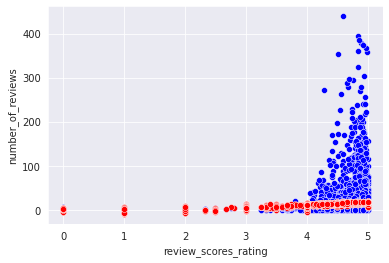

In [385]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=dff3)
sns.scatterplot(x='review_scores_rating', y='Predicciones Multiple 3', color="red", data=dff3)

In [386]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.01576322768266314

In [387]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.1255516932688012

**Reporte Final**

Después de varias líneas de código, pude llegar a los resultados finales. En cuanto a la ciudad de México, podemos observar que los coeficientes son muy bajos incluso con utilizando las variables con mayor correlación; De hecho podemos ver en la gráfica final que el modelo no se adapta bien a los datos.

Yo imaginaba que esto cambiaría con el modelo de regresión lineal múltiple, sin embargo, no fue así, los coeficientes para ambas ciudades salieron muy bajos. Gracias a todo esto, podemos notar varias cosas que se mencionarán a continuación. 

Podemos concluir que tal vez si exista un modelo que pueda predecir de mejor manera lo que buscamos, sin embargo, un modelo de regresión lineal no es el adecuado. Incluso analizando las gráficas, podemos observar que la recta no se adapta bien a los datos; de nuevo, esto es indicativo de que el modelo no se adapta de manera correcta a los datos y habría que buscar una alternativa.